# First project

# 1- introduction to tmdb-movies
> **Quistions1**:
What is the correlation between budget and revenue ?

> **Quistions2**:
What is the averege vote rate per year ?

> **Quistions3**:
Which genres are most popular ?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
%matplotlib inline
df = pd.read_csv("C:/Users/Elwakel/Downloads/tmdb-movies.csv")

In [3]:
df.shape

(10866, 21)

In [4]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# Data wrangling

**first handling incorrect data types**

In [7]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### **Now it seems that "release_date" column isn't in the right type**

In [8]:
df['release_date'] = pd.to_datetime(df['release_date'])

**it's time to deal with missing values**

In [9]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

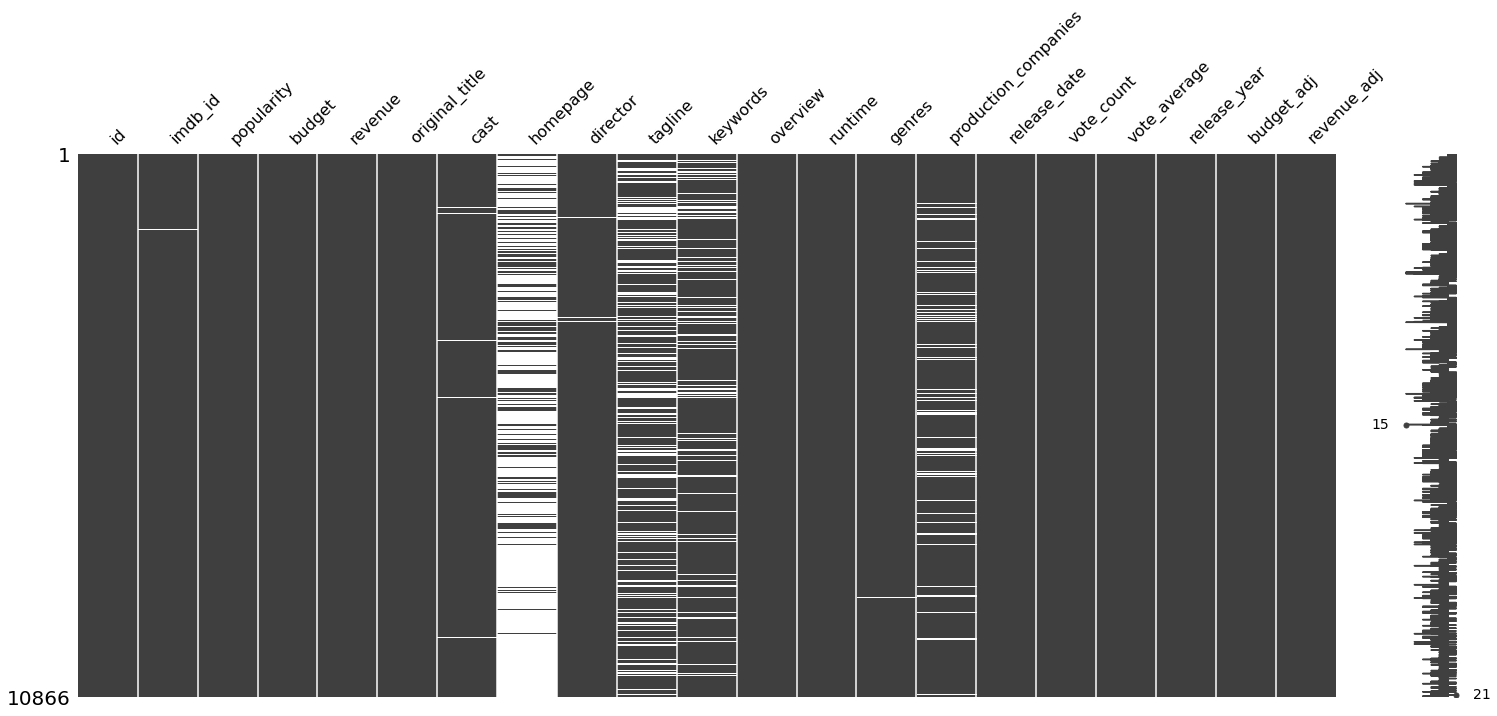

In [10]:
msno.matrix(df);

**As we don't have missing numeric data so we replaced the unknown data with "unknown" because we can't expect them
and they are too many to be removed also**

In [11]:
df = df.fillna("unknown")

**It's time to look for the duplicates in order to deal with them now**

In [12]:
sum(df.duplicated())

1

In [13]:
df.drop_duplicates(inplace= True)

In [14]:
df.nunique()

id                      10865
imdb_id                 10856
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10720
homepage                 2897
director                 5068
tagline                  7998
keywords                 8805
overview                10848
runtime                   247
genres                   2040
production_companies     7446
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

**The correlation between budget and revenue**

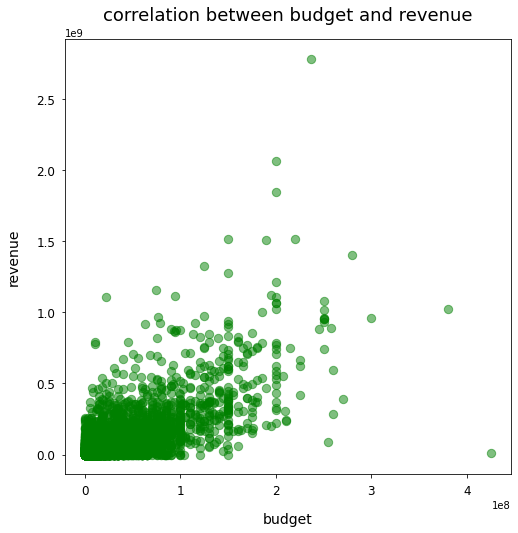

In [15]:
plt.figure(figsize=(8, 8))
plt.scatter(df['budget'], df['revenue'], c='green', s=70, alpha=0.5)
plt.title("correlation between budget and revenue", fontsize=18, y=1.03)
plt.xlabel("budget", fontsize=14, labelpad=15)
plt.ylabel("revenue", fontsize=14, labelpad=15)
plt.tick_params(labelsize=12, pad=6);

**it seems that there's no correlation between them**

**now let's see the second question**

**What is the averege vote rate per year?**

**we will explore the number of films per year to highlight the impact that can happen due to this**

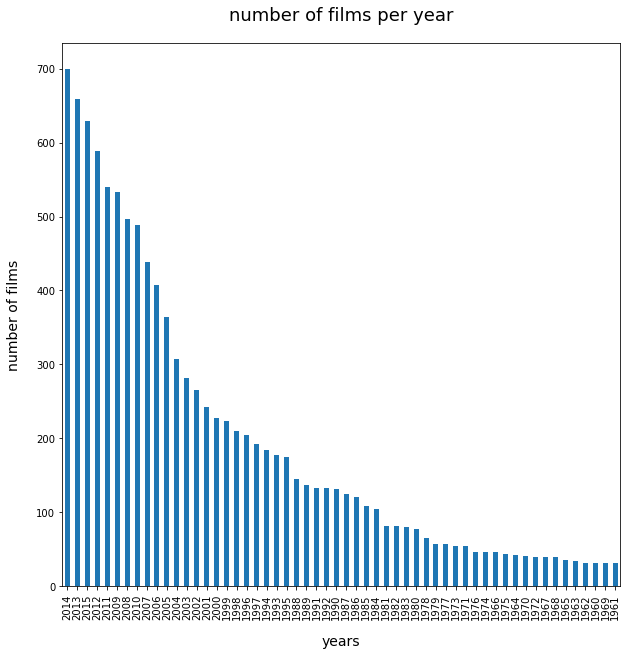

In [16]:
#number of films produced in each year
df.release_year.value_counts().plot(kind= 'bar', figsize=(10,10))
plt.title('number of films per year', fontsize=18, y=1.03)
plt.xlabel("years", fontsize=14, labelpad=15)
plt.ylabel('number of films', fontsize=14, labelpad=15);

**The number of films is increasing over time**

In [24]:
#average vote per year
g= df.groupby('release_year')
q2= g.vote_average.mean()
q2

release_year
1960    6.325000
1961    6.374194
1962    6.343750
1963    6.329412
1964    6.211905
1965    6.194286
1966    6.128261
1967    6.242500
1968    6.379487
1969    5.961290
1970    6.417073
1971    6.420000
1972    6.535000
1973    6.703636
1974    6.395745
1975    6.390909
1976    6.340426
1977    6.147368
1978    6.130769
1979    6.308772
1980    6.160256
1981    6.165854
1982    6.241975
1983    5.971250
1984    6.003810
1985    6.177064
1986    6.004959
1987    6.128800
1988    5.965517
1989    6.070073
1990    5.993939
1991    6.014286
1992    6.081203
1993    6.050000
1994    5.942391
1995    6.056000
1996    5.900980
1997    5.988542
1998    5.970476
1999    6.032589
2000    5.882379
2001    5.896281
2002    5.973308
2003    5.930961
2004    5.988599
2005    5.866484
2006    5.941422
2007    5.964384
2008    5.930847
2009    5.856660
2010    5.992843
2011    5.958519
2012    5.799830
2013    5.880577
2014    5.920714
2015    5.885692
Name: vote_average, dtype: float64

**Now we will make the next plot to see how average vote changes by time**

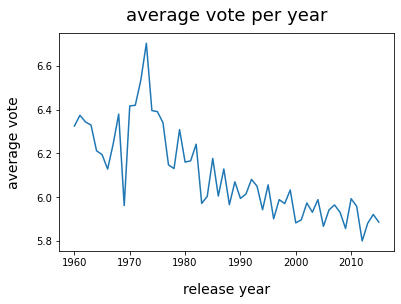

In [26]:
q2.plot()
plt.title('average vote per year', fontsize=18, y=1.03)
plt.xlabel("release year", fontsize=14, labelpad=15)
plt.ylabel('average vote', fontsize=14, labelpad=15);

**the average vote decrease by time**

**now the third question**

**Which genres are most popular ?**

In [27]:
new = df["genres"].str.split("|", expand = True)
popular_genres= new.stack().reset_index()[0].value_counts()

**to know which genres are the most popular we will make a bar chart visualizes all the records to us**

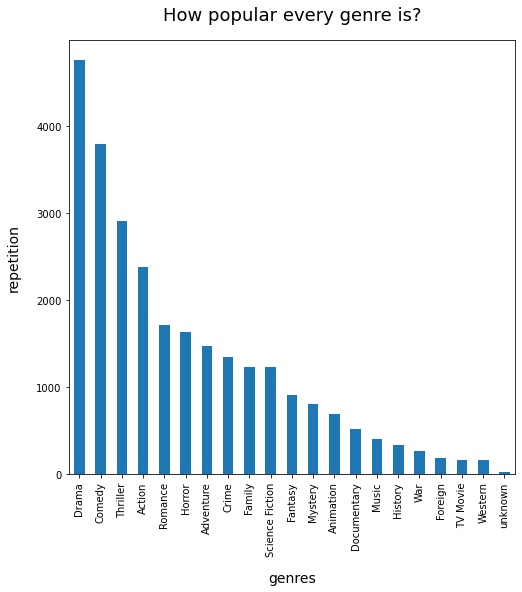

In [20]:
popular_genres.plot(kind='bar', figsize=(8, 8))
plt.title('How popular every genre is?', fontsize=18, y=1.03)
plt.xlabel("genres", fontsize=14, labelpad=15)
plt.ylabel('repetition', fontsize=14, labelpad=15);

# conclusion

**1-Contrary to expected there is no relationship between budget and revenue**

**2-According to the previous analysis the average vote decreases by time**

**3-The number of films increases alot by time**

**4-The top 4 genres throughout time are drama, comedy, thriller and action**

**5-There were alot of NaN values but they won't affect our analysis because we were working on another variables**